In [4]:
import pandas as pd
import numpy as np

import datetime

import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.dates as mdates

import seaborn as sns
sns.set(rc={'figure.figsize':(20, 6)}, font_scale=2)
sns.set_style(style='whitegrid')

import math

import sys
sys.path.append('../')
import utils

In [5]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Generate Base time series

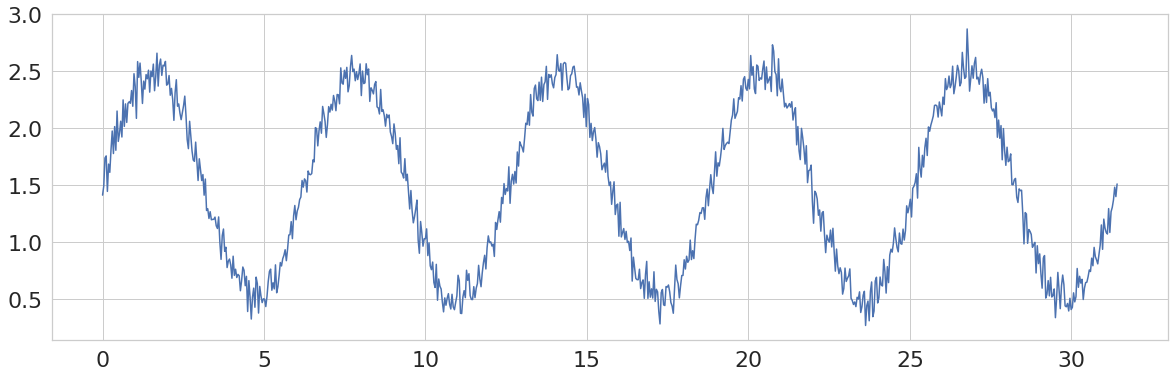

In [6]:
num_periods = 5
num_points_per_period=7*24

STS = utils.data_generation.SyntheticTimeSeries(
    num_periods=num_periods, num_points_per_period=num_points_per_period,
    white_noise_std=0.10, seed=1)
STS.generate()
df = STS.get_df()
df['measure']+=1.5
plt.plot(df['time'], df['measure'])

In [7]:
regions_df = pd.DataFrame(columns=['region_id', 'start', 'end', 'length'])

## Inject Regions

In [8]:
# 1st Injected region
region1=[2.5*math.pi, 3*math.pi]
np.random.seed(1)

# num_vals_in_range = len(df[(df['time']>= region1[0]) & (df['time']<= region1[1])]['measure'])
region1_slice = df[(df['time']>= region1[0]) & (df['time']<= region1[1])]['measure']
num_vals_in_range = len(region1_slice) 
region1_vals = np.random.normal(2.5, 0.10, num_vals_in_range)
idx=0
for i, row in df[(df['time']>= region1[0]) & (df['time']<= region1[1])].iterrows():
    df.loc[i, 'measure'] = region1_vals[idx]
    idx+=1
regions_df.loc[len(regions_df.index)] = [0, int(region1_slice.index[0]), int(region1_slice.index[-1]), int(region1_slice.index[-1] - region1_slice.index[0] + 1)]

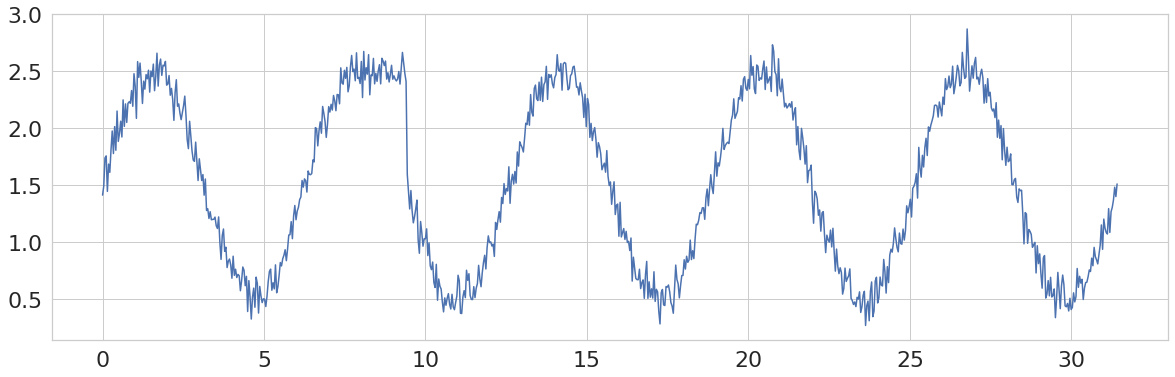

In [9]:
plt.plot(df['time'], df['measure'])

In [10]:
# 2nd Injected Region (Consistent High Residual)
region2=[5.2*math.pi, 5.8*math.pi]
region2_slice=df[(df['time']>= region2[0]) & (df['time']<= region2[1])]['measure']
regions_df.loc[len(regions_df.index)] = [0, int(region2_slice.index[0]), int(region2_slice.index[-1]), int(region2_slice.index[-1] - region2_slice.index[0] + 1)]

In [11]:
num_vals_in_range = len(region2_slice) 
# region2_vals = np.random.normal(0.5, 0.2, num_vals_in_range)
# idx=0
for i, row in df[(df['time']>= region2[0]) & (df['time']<= region2[1])].iterrows():
    new_val = row['measure'] + np.random.normal(0,0.3)
    if new_val < 0:
        new_val = 0
    df.loc[i, 'measure'] = new_val

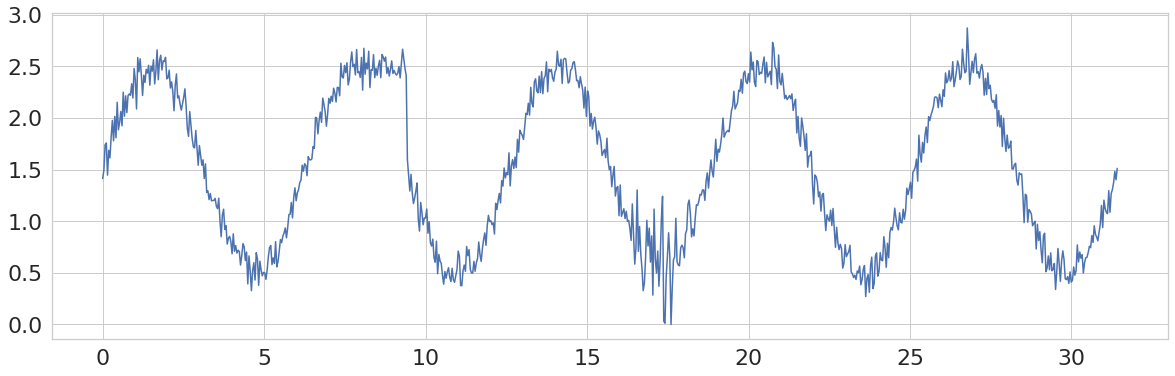

In [12]:
plt.plot(df['time'], df['measure'])

In [13]:
# 3rd Injected Region
region3=[8.4*math.pi, 8.7*math.pi]
region3_slice=df[(df['time']>= region3[0]) & (df['time']<= region3[1])]['measure']
num_vals_in_range = len(region3_slice)
for i, row in df[(df['time']>= region3[0]) & (df['time']<= region3[1])].iterrows():
    df.loc[i, 'measure'] = row['measure'] * 1.25
regions_df.loc[len(regions_df.index)] = [0, region3_slice.index[0], region3_slice.index[-1], region3_slice.index[-1] - region3_slice.index[0] + 1]

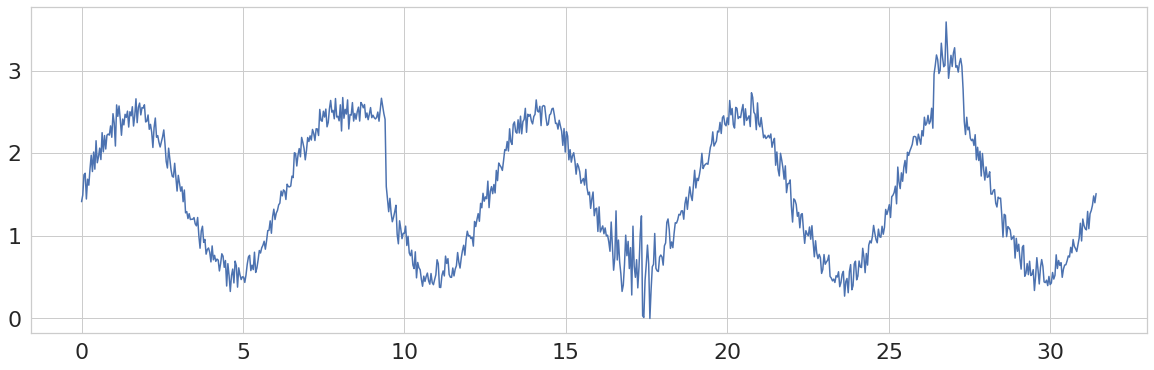

In [14]:
plt.plot(df['time'], df['measure'])

## Inject more point outliers

In [15]:
df.loc[55, 'measure'] = 0
df.loc[152, 'measure'] = 0
df.loc[300, 'measure'] = 2.0
df.loc[360, 'measure'] = 3.4
df.loc[509, 'measure'] = 3
df.loc[780, 'measure'] = 0
df.loc[781, 'measure'] = 0

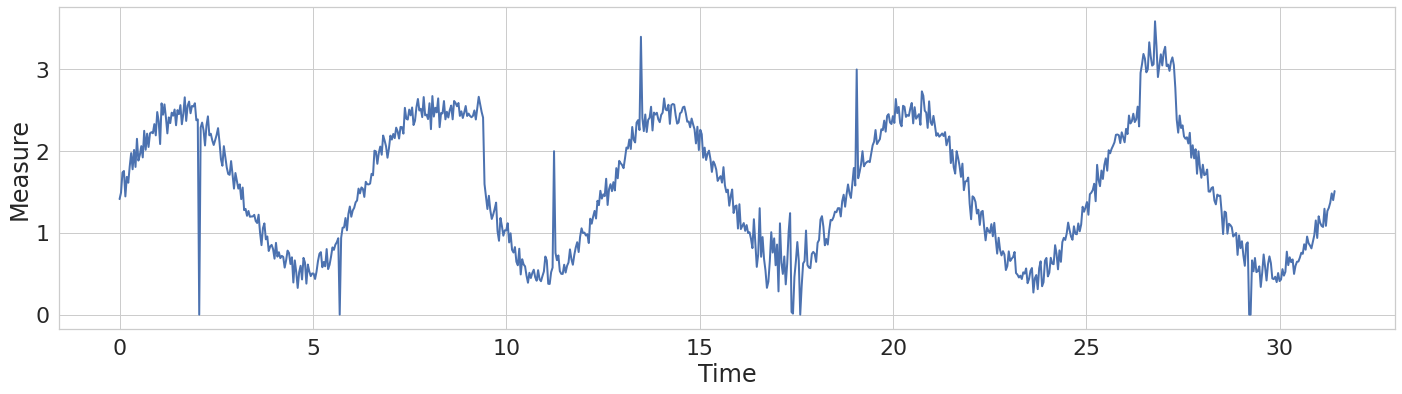

In [16]:
plt.plot(df['time'], df['measure'], linewidth=2)
plt.xlabel('Time');plt.ylabel('Measure');plt.tight_layout()
plt.savefig('figures/streaming/raw_time_series.svg')

In [17]:
regions_df.to_pickle('streaming_example/regions_df.pickle')
df['unix_time'] = df['timestamp'].apply(lambda x: x.timestamp())
df.to_pickle('streaming_example/df.pickle')

In [18]:
regions_df

,region_id,start,end,length
0,0,210,251,42
1,0,437,486,50
2,0,705,729,25


In [19]:
df

,time,timestamp,measure,signal,noise,is_outlier,outlier_type,unix_time
0,0.000000,2020-06-01 00:00:00,1.414017,0.000000e+00,-0.085983,0,NaN,1.590970e+09
1,0.037444,2020-06-01 01:00:00,1.493645,3.743574e-02,-0.043791,0,NaN,1.590973e+09
2,0.074889,2020-06-01 02:00:00,1.739674,7.481900e-02,0.164855,0,NaN,1.590977e+09
3,0.112333,2020-06-01 03:00:00,1.757975,1.120974e-01,0.145877,0,NaN,1.590980e+09
4,0.149778,2020-06-01 04:00:00,1.446598,1.492186e-01,-0.202621,0,noise,1.590984e+09
...,...,...,...,...,...,...,...,...
835,31.266149,2020-07-05 19:00:00,1.306745,-1.492186e-01,-0.044036,0,NaN,1.593976e+09
836,31.303593,2020-07-05 20:00:00,1.371590,-1.120974e-01,-0.016313,0,NaN,1.593979e+09
837,31.341038,2020-07-05 21:00:00,1.483299,-7.481900e-02,0.058118,0,NaN,1.593983e+09
838,31.378482,2020-07-05 22:00:00,1.401100,-3.743574e-02,-0.061464,0,NaN,1.593986e+09


# Evaluation Figures

## Offline Evaluation

In [22]:
density_df = pd.read_pickle('streaming_example/streaming_evaluation/outputs/size_840/density_df.pickle')
df = pd.read_pickle('streaming_example/streaming_evaluation/outputs/size_840/df.pickle')

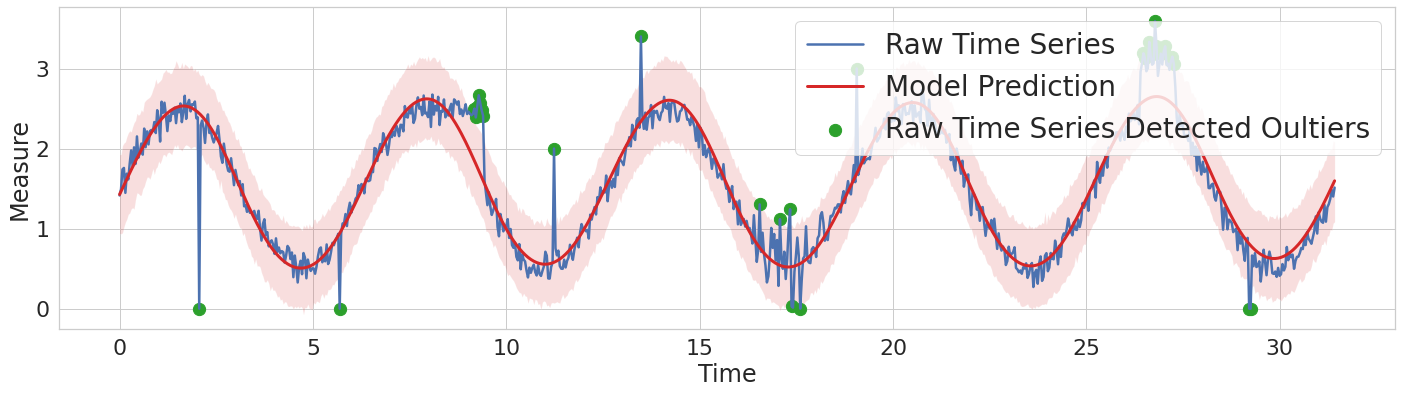

In [23]:
raw_outliers_df = df[df['is_outlier_raw_data_fit'] > 0]

fig, ax=plt.subplots()
plt.plot(df['time'], df['measure'], linewidth=2.5, label='Raw Time Series')
plt.plot(df['time'], df['yhat'], linewidth=3, label='Model Prediction', color='tab:red')

ax = ax.fill_between(df['time'], df['yhat_lower'], df['yhat_upper'], facecolor='tab:red', alpha=0.15)
plt.scatter(raw_outliers_df['time'], raw_outliers_df['measure'], color='tab:green', s=150, label='Raw Time Series Detected Oultiers')
plt.xlabel('Time');plt.ylabel('Measure');plt.legend(fontsize=28);plt.tight_layout()

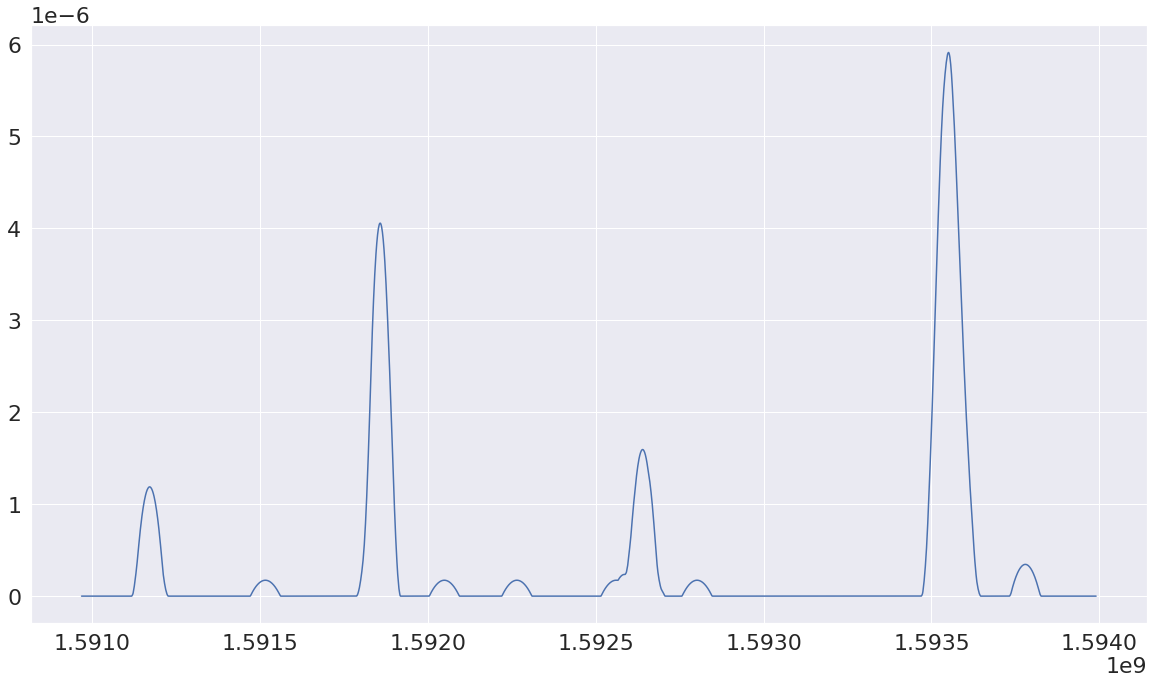

In [20]:
plt.plot(density_df['unix_time'], density_df['density'])

## Streaming Evaluation

In [51]:
import datetime
start_time = datetime.datetime(2020,6,1,0,0,0).timestamp()

def unix_time_to_base_time(start_time, unix_time):
    delta = unix_time - start_time
    base_time = (10*math.pi*delta) / (35*24*3600-3600)
    return base_time

unix_time_to_base_time(start_time=start_time, unix_time=1.593450e+09)

25.649475181275424

### Density at 708

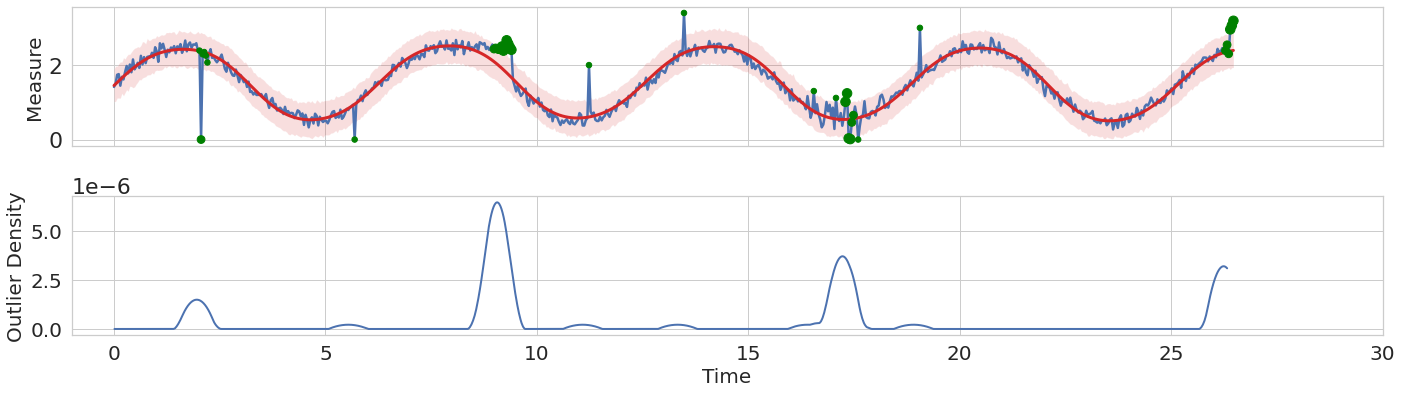

In [92]:
size=708

density_df=pd.read_pickle('streaming_example/streaming_evaluation/outputs/size_'+str(size)+'/density_df.pickle')
density_df['time'] = [unix_time_to_base_time(start_time=start_time, unix_time=time) for time in density_df['unix_time']]
density_df = density_df[density_df['time']>=0]

df = pd.read_pickle('streaming_example/streaming_evaluation/outputs/size_'+str(size)+'/df.pickle')
clusters_df=pd.read_pickle('streaming_example/streaming_evaluation/outputs/size_'+str(size)+'/clusters_df.pickle')

fig, axs=plt.subplots(nrows=2, sharex=True)

axs[0].plot(df['time'], df['measure'], linewidth=2.5, label='Raw Time Series')
axs[0].plot(df['time'], df['yhat'], linewidth=3, label='Model Prediction', color='tab:red')
axs[0].scatter(df[df['raw_voting_score']>0]['time'].values, df[df['raw_voting_score']>0]['measure'].values, s=30*df[df['raw_voting_score']>0]['raw_voting_score'] , c='green', zorder=10, label='Detected Outliers across all views')
axs[0] = axs[0].fill_between(df['time'], df['yhat_lower'], df['yhat_upper'], facecolor='tab:red', alpha=0.15)
axs[0].axes.set_ylabel('Measure', fontsize=20)
axs[0].axes.set_xlim(-1,30)

axs[1].plot(density_df['time'], density_df['density'], linewidth=2)
axs[1].axes.set_ylabel('Outlier Density', fontsize=20);axs[1].axes.set_xlabel('Time', fontsize=20)
plt.xticks(fontsize=20);plt.yticks(fontsize=20);plt.tight_layout()
plt.savefig('figures/streaming/density_708.svg')

In [70]:
clusters_df.sort_values(by='area', ascending=False)

,cluster_id,start,end,point_start,point_end,time_length,num_points,area,area_pts
2,5,1.591787e+09,1.591919e+09,1.591834e+09,1.591873e+09,131886.010363,12,0.415602,0.237777
6,13,1.592587e+09,1.592708e+09,1.592611e+09,1.592662e+09,121095.336787,8,0.233508,0.164781
8,17,1.593450e+09,1.593515e+09,1.593497e+09,1.593515e+09,64744.041451,6,0.122813,0.056855
0,1,1.591118e+09,1.591228e+09,1.591164e+09,1.591182e+09,110304.663213,6,0.090914,0.026549
3,7,1.592003e+09,1.592095e+09,1.592050e+09,1.592050e+09,92320.207254,1,0.012987,0.000000
1,3,1.591471e+09,1.591563e+09,1.591517e+09,1.591517e+09,92320.207254,1,0.012987,0.000000
7,15,1.592756e+09,1.592848e+09,1.592802e+09,1.592802e+09,92320.207254,1,0.012987,0.000000
4,9,1.592220e+09,1.592312e+09,1.592266e+09,1.592266e+09,92320.207254,1,0.012987,0.000000
5,11,1.592515e+09,1.592565e+09,1.592561e+09,1.592561e+09,50356.476684,1,0.007216,0.000000


### Density at 716

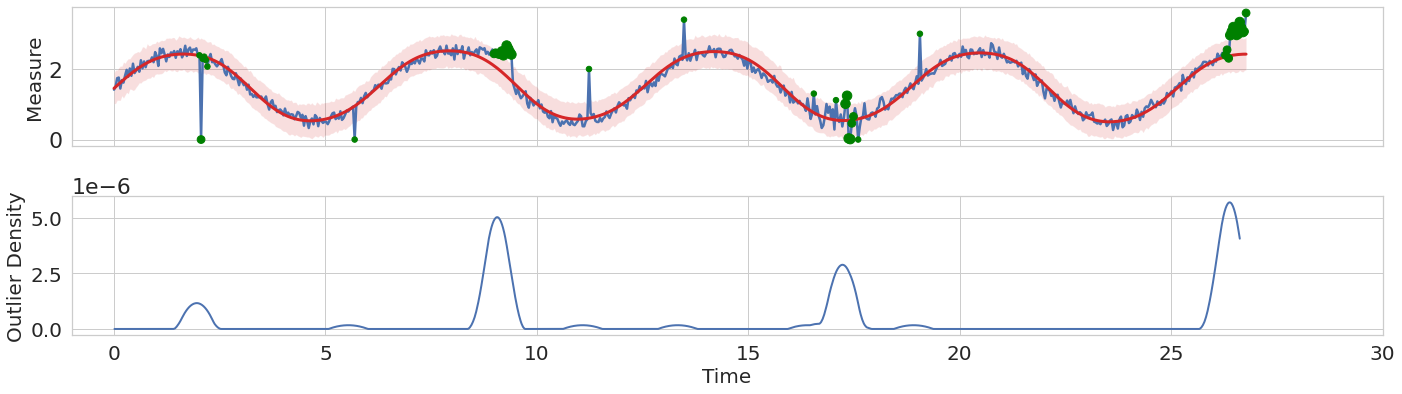

In [93]:
# Alert at the 3rd region
size=716
density_df=pd.read_pickle('streaming_example/streaming_evaluation/outputs/size_'+str(size)+'/density_df.pickle')
density_df['time'] = [unix_time_to_base_time(start_time=start_time, unix_time=time) for time in density_df['unix_time']]
density_df = density_df[density_df['time']>=0]

df = pd.read_pickle('streaming_example/streaming_evaluation/outputs/size_'+str(size)+'/df.pickle')
clusters_df=pd.read_pickle('streaming_example/streaming_evaluation/outputs/size_'+str(size)+'/clusters_df.pickle')

fig, axs=plt.subplots(nrows=2, sharex=True)

axs[0].plot(df['time'], df['measure'], linewidth=2.5, label='Raw Time Series')
axs[0].plot(df['time'], df['yhat'], linewidth=3, label='Model Prediction', color='tab:red')
axs[0].scatter(df[df['raw_voting_score']>0]['time'].values, df[df['raw_voting_score']>0]['measure'].values, s=30*df[df['raw_voting_score']>0]['raw_voting_score'] , c='green', zorder=10, label='Detected Outliers across all views')
axs[0] = axs[0].fill_between(df['time'], df['yhat_lower'], df['yhat_upper'], facecolor='tab:red', alpha=0.15)
axs[0].axes.set_ylabel('Measure', fontsize=20)
axs[0].axes.set_xlim(-1,30)

axs[1].plot(density_df['time'], density_df['density'], linewidth=2)
axs[1].axes.set_ylabel('Outlier Density', fontsize=20);axs[1].axes.set_xlabel('Time', fontsize=20)
plt.xticks(fontsize=20);plt.yticks(fontsize=20);plt.tight_layout()
plt.savefig('figures/streaming/density_716.svg')

In [76]:
clusters_df.sort_values(by='area', ascending=False)

,cluster_id,start,end,point_start,point_end,time_length,num_points,area,area_pts
2,5,1.591787e+09,1.591919e+09,1.591834e+09,1.591873e+09,131887.284583,12,0.323246,0.184942
8,17,1.593450e+09,1.593544e+09,1.593497e+09,1.593544e+09,93520.074522,14,0.305432,0.239892
6,13,1.592587e+09,1.592708e+09,1.592611e+09,1.592662e+09,121096.506754,8,0.181614,0.128175
0,1,1.591118e+09,1.591228e+09,1.591164e+09,1.591182e+09,110305.728924,6,0.070711,0.020650
3,7,1.592003e+09,1.592095e+09,1.592050e+09,1.592050e+09,92321.099208,1,0.010101,0.000000
1,3,1.591471e+09,1.591563e+09,1.591517e+09,1.591517e+09,92321.099208,1,0.010101,0.000000
7,15,1.592756e+09,1.592848e+09,1.592802e+09,1.592802e+09,92321.099208,1,0.010101,0.000000
4,9,1.592220e+09,1.592312e+09,1.592266e+09,1.592266e+09,92321.099208,1,0.010101,0.000000
5,11,1.592515e+09,1.592565e+09,1.592561e+09,1.592561e+09,50356.963204,1,0.005615,0.000000


### Density at 724

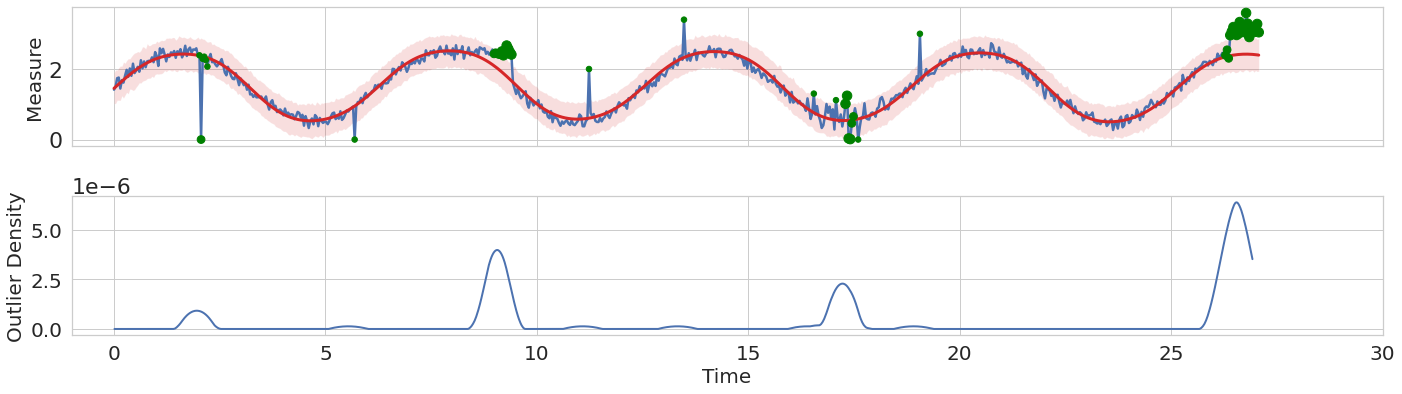

In [94]:
# Alert at the 3rd region
size=724
density_df=pd.read_pickle('streaming_example/streaming_evaluation/outputs/size_'+str(size)+'/density_df.pickle')
density_df['time'] = [unix_time_to_base_time(start_time=start_time, unix_time=time) for time in density_df['unix_time']]
density_df = density_df[density_df['time']>=0]

df = pd.read_pickle('streaming_example/streaming_evaluation/outputs/size_'+str(size)+'/df.pickle')
clusters_df=pd.read_pickle('streaming_example/streaming_evaluation/outputs/size_'+str(size)+'/clusters_df.pickle')

fig, axs=plt.subplots(nrows=2, sharex=True)

axs[0].plot(df['time'], df['measure'], linewidth=2.5, label='Raw Time Series')
axs[0].plot(df['time'], df['yhat'], linewidth=3, label='Model Prediction', color='tab:red')
axs[0].scatter(df[df['raw_voting_score']>0]['time'].values, df[df['raw_voting_score']>0]['measure'].values, s=30*df[df['raw_voting_score']>0]['raw_voting_score'] , c='green', zorder=10, label='Detected Outliers across all views')
axs[0] = axs[0].fill_between(df['time'], df['yhat_lower'], df['yhat_upper'], facecolor='tab:red', alpha=0.15)
axs[0].axes.set_ylabel('Measure', fontsize=20)
axs[0].axes.set_xlim(-1,30)

axs[1].plot(density_df['time'], density_df['density'],linewidth=2)
axs[1].axes.set_ylabel('Outlier Density', fontsize=20);axs[1].axes.set_xlabel('Time', fontsize=20)
plt.xticks(fontsize=20);plt.yticks(fontsize=20);plt.tight_layout()
plt.savefig('figures/streaming/density_724.svg')

In [86]:
clusters_df.sort_values(by='area', ascending=False)

,cluster_id,start,end,point_start,point_end,time_length,num_points,area,area_pts
8,17,1.593450e+09,1.593572e+09,1.593497e+09,1.593572e+09,122296.637494,22,0.442340,0.390347
2,5,1.591787e+09,1.591919e+09,1.591834e+09,1.591873e+09,131888.530631,12,0.256011,0.146477
6,13,1.592587e+09,1.592708e+09,1.592611e+09,1.592662e+09,121097.650852,8,0.143835,0.101524
0,1,1.591118e+09,1.591228e+09,1.591164e+09,1.591182e+09,110306.771073,6,0.056003,0.016355
4,9,1.592219e+09,1.592311e+09,1.592266e+09,1.592266e+09,92321.971442,1,0.008000,0.000000
3,7,1.592003e+09,1.592095e+09,1.592050e+09,1.592050e+09,92321.971442,1,0.008000,0.000000
1,3,1.591471e+09,1.591563e+09,1.591517e+09,1.591517e+09,92321.971442,1,0.008000,0.000000
7,15,1.592756e+09,1.592848e+09,1.592802e+09,1.592802e+09,92321.971442,1,0.008000,0.000000
5,11,1.592515e+09,1.592565e+09,1.592561e+09,1.592561e+09,50357.438968,1,0.004449,0.000000


# Testing

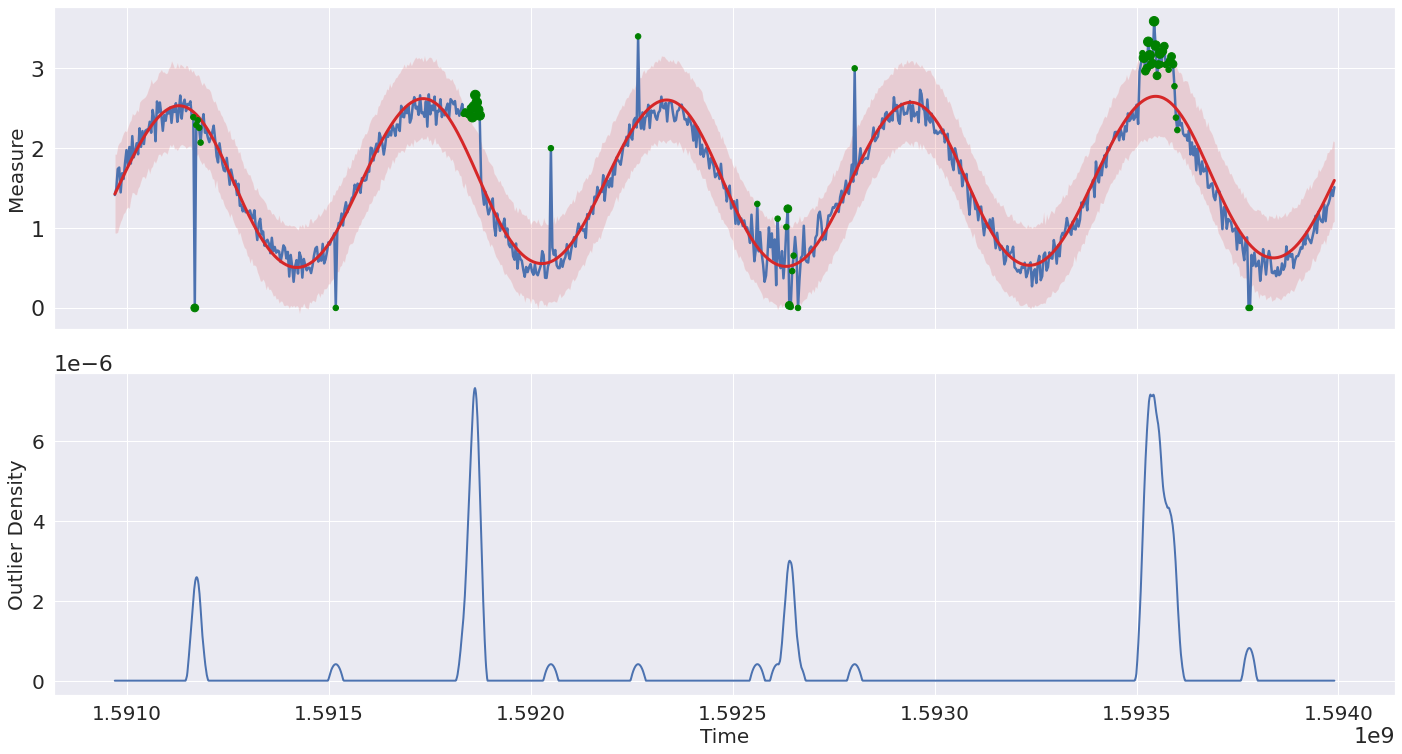

In [5]:
density_df = pd.read_pickle('streaming_example/ISJ_bandwidth/outputs/size_840/density_df.pickle')
df = pd.read_pickle('streaming_example/ISJ_bandwidth/outputs/size_840/df.pickle')


fig, axs=plt.subplots(nrows=2, sharex=True)

axs[0].plot(df['unix_time'], df['measure'], linewidth=2.5, label='Raw Time Series')
axs[0].plot(df['unix_time'], df['yhat'], linewidth=3, label='Model Prediction', color='tab:red')
axs[0].scatter(df[df['raw_voting_score']>0]['unix_time'].values, df[df['raw_voting_score']>0]['measure'].values, s=30*df[df['raw_voting_score']>0]['raw_voting_score'] , c='green', zorder=10, label='Detected Outliers across all views')
axs[0] = axs[0].fill_between(df['unix_time'], df['yhat_lower'], df['yhat_upper'], facecolor='tab:red', alpha=0.15)
axs[0].axes.set_ylabel('Measure', fontsize=20)
# axs[0].axes.set_xlim(-1,30)

axs[1].plot(density_df['unix_time'], density_df['density'], linewidth=2)
axs[1].axes.set_ylabel('Outlier Density', fontsize=20);axs[1].axes.set_xlabel('Time', fontsize=20)
plt.xticks(fontsize=20);plt.yticks(fontsize=20);plt.tight_layout()
# plt.savefig('figures/streaming/density_708.svg')

In [4]:
density_df

,unix_time,density,timestamp
0,1.590970e+09,2.220446e-16,2020-05-31 23:58:20.000000000
1,1.590971e+09,2.220446e-16,2020-06-01 00:18:19.126637568
2,1.590972e+09,2.220446e-16,2020-06-01 00:38:18.253275136
3,1.590973e+09,2.220446e-16,2020-06-01 00:58:17.379912704
4,1.590974e+09,2.220446e-16,2020-06-01 01:18:16.506550272
...,...,...,...
2515,1.593985e+09,2.220446e-16,2020-07-05 21:41:43.493449728
2516,1.593987e+09,2.220446e-16,2020-07-05 22:01:42.620087296
2517,1.593988e+09,2.220446e-16,2020-07-05 22:21:41.746724864
2518,1.593989e+09,2.220446e-16,2020-07-05 22:41:40.873362432
